In [28]:
# Step 1: Load the seed.csv into your notebook
import pandas as pd

# Assuming the seed.csv file is in the same directory as your notebook
data = pd.read_csv("seeds.csv")

In [29]:
# Step 2: Pre-processing and prepare the data for giving to the neural network
# a. Encoding the species names using label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])

scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

X_train, X_val, y_train, y_val = train_test_split(
    data.iloc[:, :-1], data['Type'], test_size=0.2, random_state=42
)

In [30]:
# Step 3: Building the sequential neural network model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming you have 3 classes for 'Type'

# b. Use appropriate activation and loss functions
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

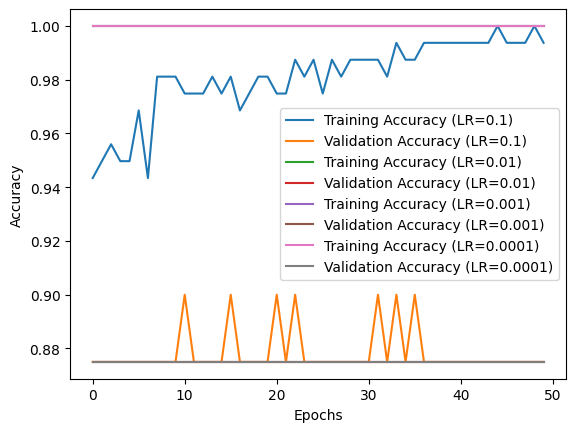

In [31]:
from keras.optimizers import SGD
import matplotlib.pylab as plt
# Step 4: Compile and fit the model to the training dataset. Use validation also. Use SGD as optimizer.
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=0)

# Step 5: Use learning rates as (0.1, 0.01, 0.001, 0.0001) and train the model. 
# Plot the training and validation accuracy curves and note the best learning rate.
learning_rates = [0.1, 0.01, 0.001, 0.0001]
for lr in learning_rates:
    model.compile(optimizer=SGD(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=0)

    # Plot the training and validation accuracy curves
    plt.plot(history.history['accuracy'], label=f'Training Accuracy (LR={lr})')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (LR={lr})')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

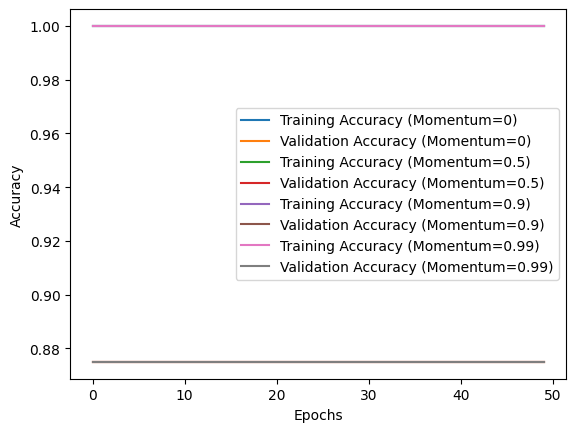

In [32]:
# Note the best learning rate from the plots

# Step 6: Use the best learning rate and add momentum to it. Use different momentum values as 0, 0.5, 0.9, 0.99. 
# Train the model and note the best momentum value.
momentum_values = [0, 0.5, 0.9, 0.99]
best_lr = 0.01  # Use the best learning rate from the previous step

for momentum in momentum_values:
    model.compile(optimizer=SGD(learning_rate=best_lr, momentum=momentum),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=0)

    # Plot the training and validation accuracy curves
    plt.plot(history.history['accuracy'], label=f'Training Accuracy (Momentum={momentum})')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (Momentum={momentum})')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

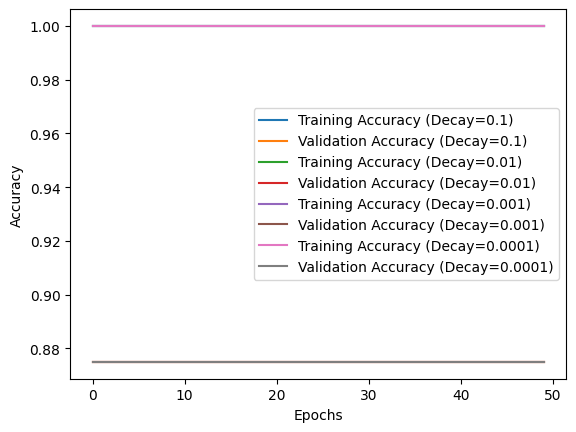

In [33]:
# Import necessary libraries
from keras.optimizers import SGD
from keras.optimizers.schedules import ExponentialDecay
import matplotlib.pyplot as plt


# Step 7: Add a decay parameter to the optimizer. Use decay values as 1E-1, 1E-2, 1E-3, 1E-4.
decay_values = [1e-1, 1e-2, 1e-3, 1e-4]
best_momentum = 0.9  # Use the best momentum from the previous step

for decay in decay_values:
    learning_rate = ExponentialDecay(initial_learning_rate=best_lr, decay_steps=10000, decay_rate=decay)
    optimizer = SGD(learning_rate=learning_rate, momentum=best_momentum)
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=0)

    # Plot the training and validation accuracy curves
    plt.plot(history.history['accuracy'], label=f'Training Accuracy (Decay={decay})')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (Decay={decay})')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training Accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracy: [0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875]
Training Accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracy: [0.875, 0.875, 0.875, 0.8500000238418579, 0.875, 0.875, 0.875, 0.87

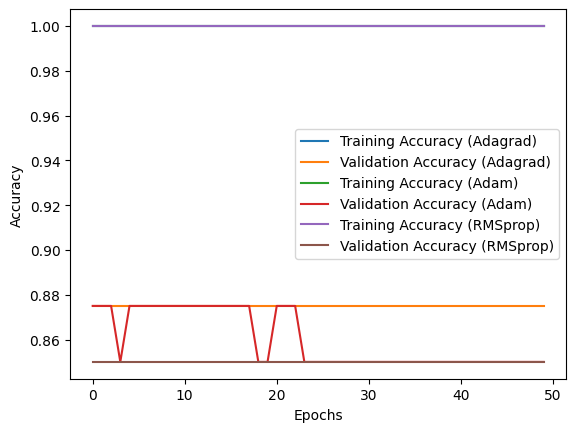

In [34]:
# Step 8: Train the model using Adagrad, Adam, and RMSprop and conclude which works best.
optimizers = ['Adagrad', 'Adam', 'RMSprop']

for optimizer in optimizers:
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=0)

    print(f"Training Accuracy: {history.history['accuracy']}")
    print(f"Validation Accuracy: {history.history['val_accuracy']}")


    # Plot the training and validation accuracy curve
    plt.plot(history.history['accuracy'], label=f'Training Accuracy ({optimizer})')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({optimizer})')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()